# SpaceX Portfolio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# SpaceX
title = "SpaceX"
symbols = ['BA', 'TSLA', 'SPCE','LMT','NOC','LDOS']
start = '2019-12-01'
end = '2020-06-01'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

179

In [7]:
df.head()

,BA,TSLA,SPCE,LMT,NOC,LDOS
Date,,,,,,
2019-12-02,353.079285,334.869995,7.44,378.929810,339.047699,89.160278
2019-12-03,349.997620,336.200012,7.46,376.954254,340.456543,88.971741
2019-12-04,346.776764,333.029999,7.22,379.878082,340.516052,89.051117
2019-12-05,343.635468,330.369995,7.22,381.221436,341.706635,89.259506
2019-12-06,351.995728,335.890015,7.26,382.130188,342.053925,89.983910


In [8]:
df.tail()

,BA,TSLA,SPCE,LMT,NOC,LDOS
Date,,,,,,
2020-05-22,137.529999,816.880005,15.740000,366.777344,324.531158,100.959999
2020-05-26,144.729996,818.869995,16.330000,369.958069,322.818451,102.250000
2020-05-27,149.520004,820.229980,17.520000,394.727966,341.528961,102.760002
2020-05-28,149.820007,805.809998,16.469999,396.040009,341.279999,104.360001
2020-05-29,145.850006,835.000000,17.040001,388.440002,335.200012,105.290001


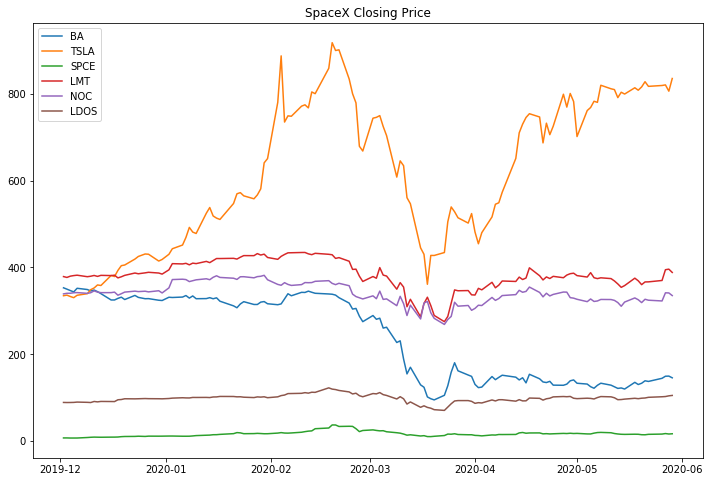

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

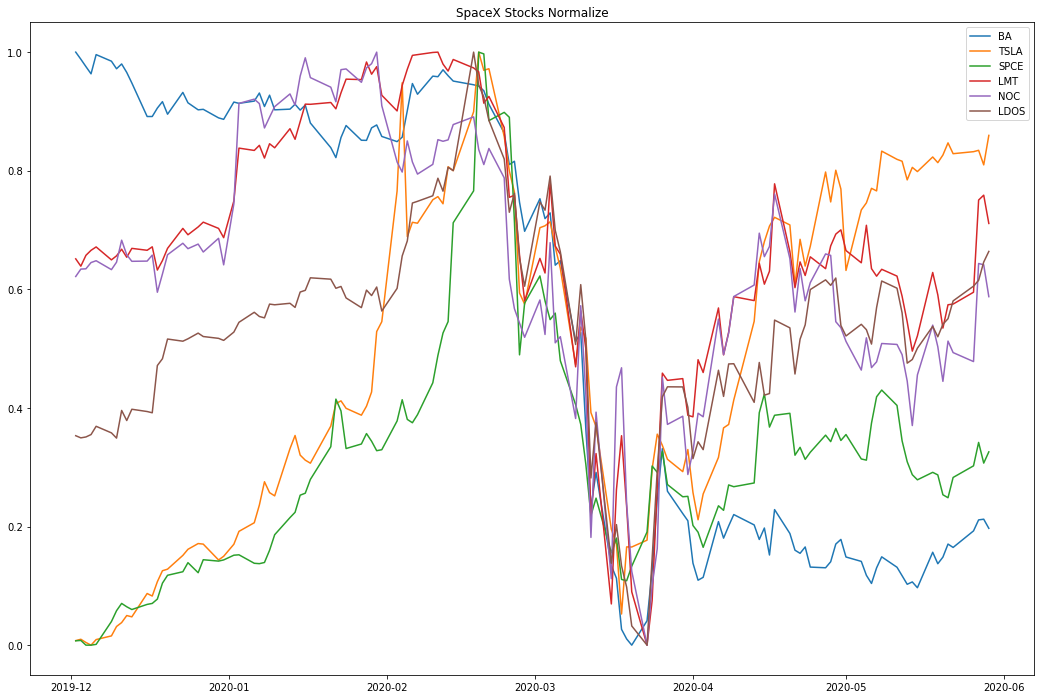

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

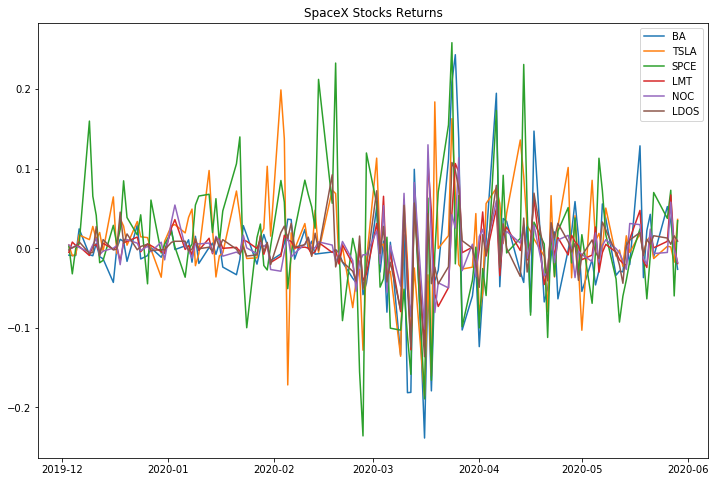

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title + ' Stocks Returns')
plt.legend(labels=stock_rets.columns)

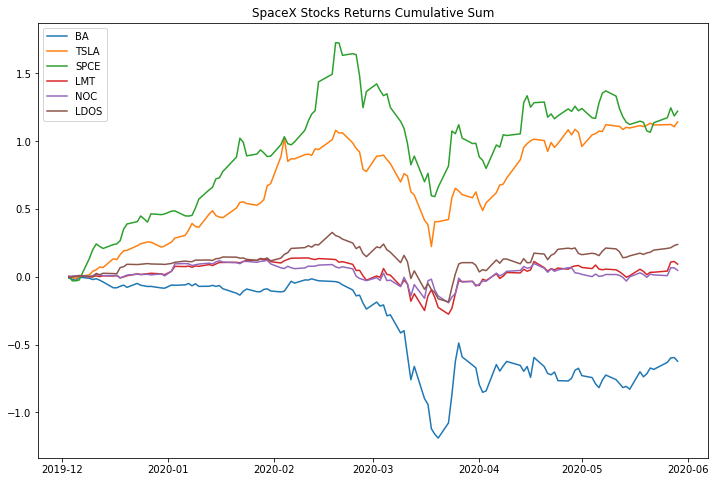

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

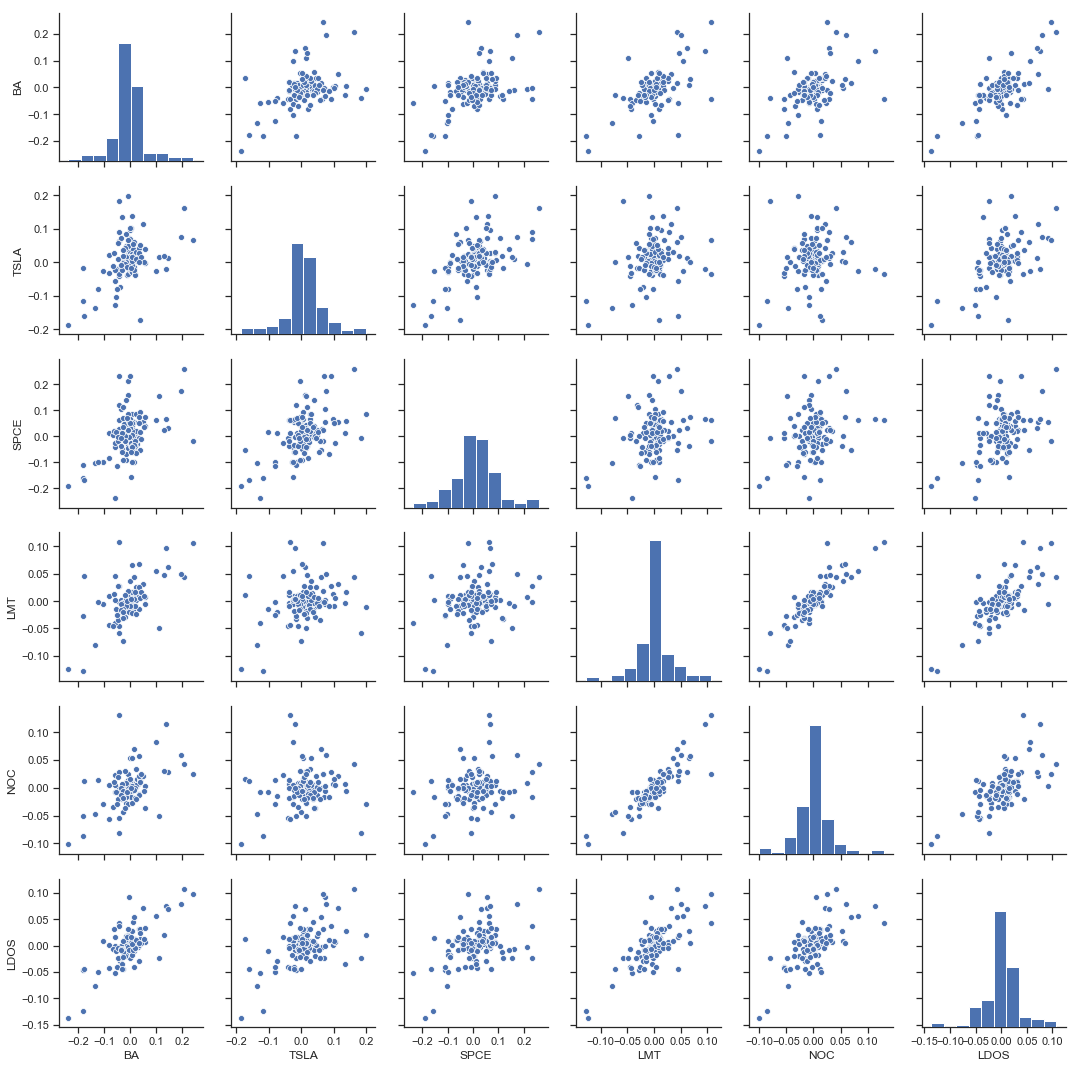

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

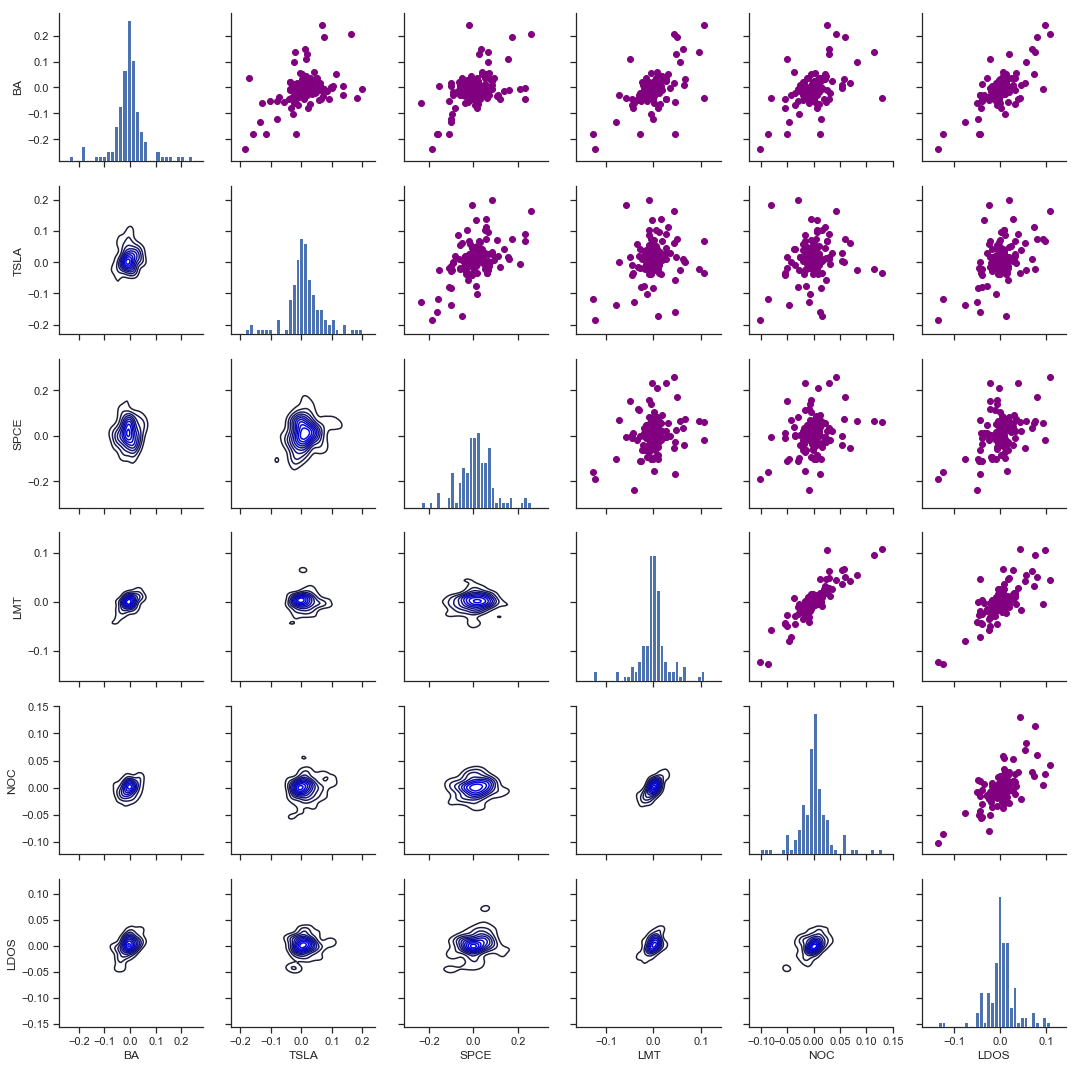

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

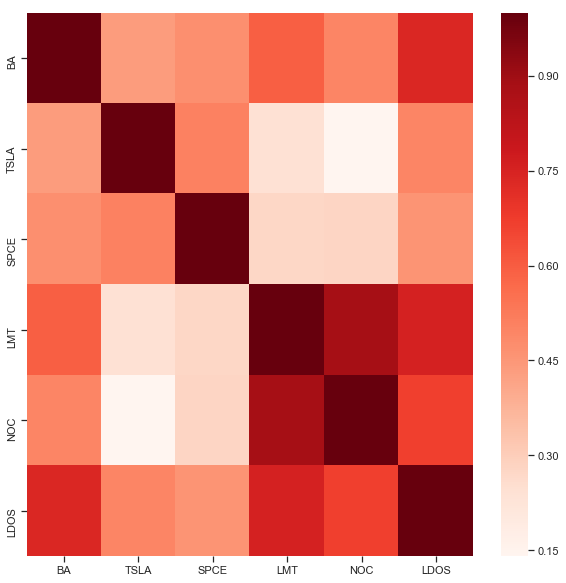

In [17]:
plt.figure(figsize=(10,10))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

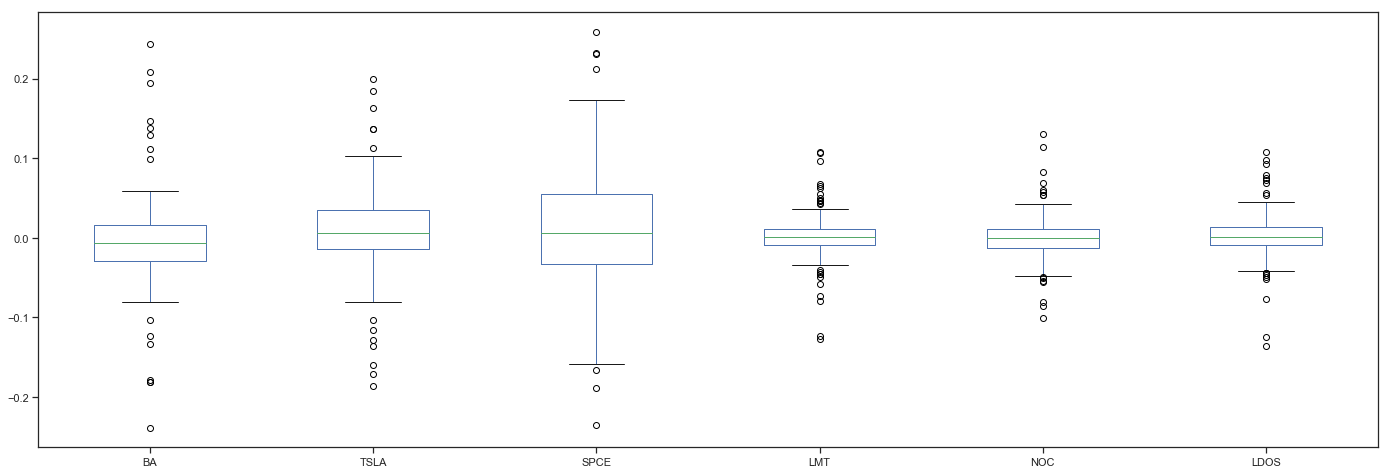

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(24,8))

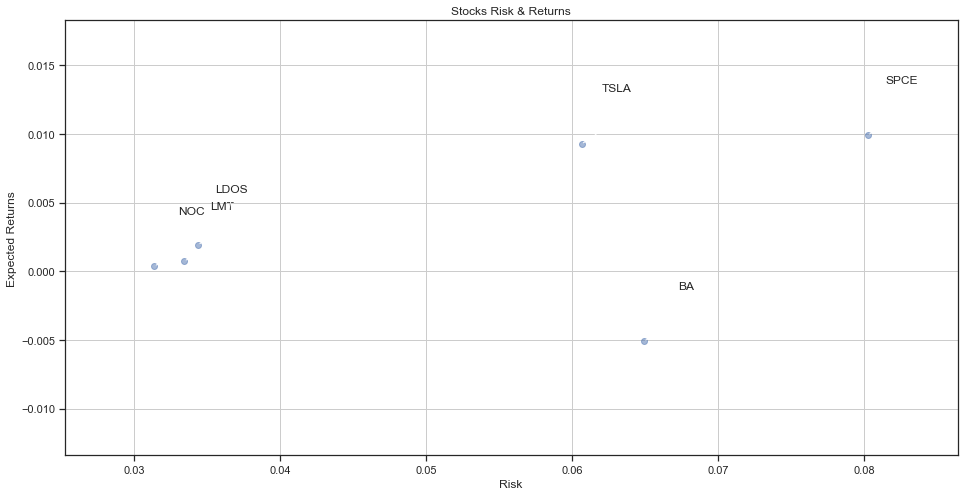

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

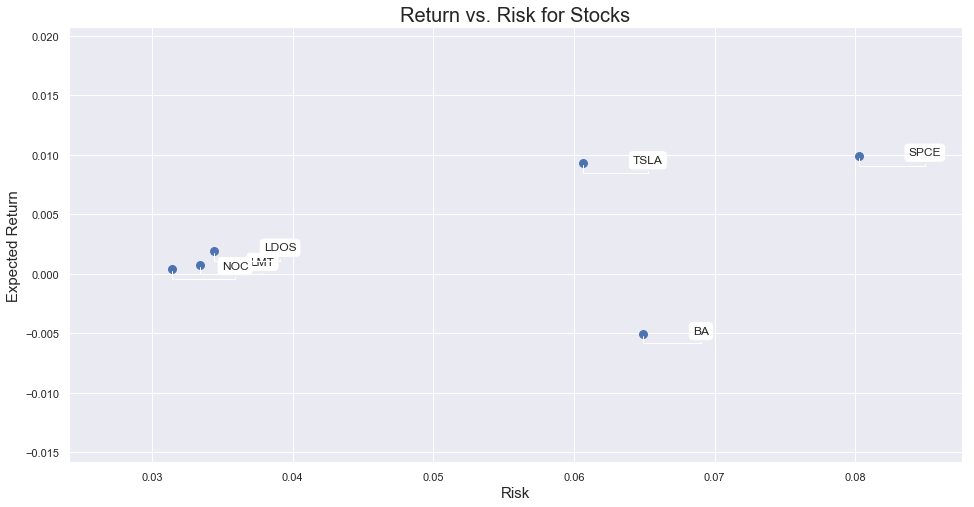

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Expected Return", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.std(), rets.mean()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

LDOS  LDOS    1.000000
NOC   NOC     1.000000
TSLA  TSLA    1.000000
SPCE  SPCE    1.000000
LMT   LMT     1.000000
BA    BA      1.000000
NOC   LMT     0.886977
LMT   NOC     0.886977
      LDOS    0.758027
LDOS  LMT     0.758027
      BA      0.738257
BA    LDOS    0.738257
NOC   LDOS    0.668499
LDOS  NOC     0.668499
BA    LMT     0.596671
LMT   BA      0.596671
SPCE  TSLA    0.509609
TSLA  SPCE    0.509609
BA    NOC     0.498895
NOC   BA      0.498895
TSLA  LDOS    0.498308
LDOS  TSLA    0.498308
BA    SPCE    0.471701
SPCE  BA      0.471701
LDOS  SPCE    0.458546
SPCE  LDOS    0.458546
TSLA  BA      0.438817
BA    TSLA    0.438817
SPCE  NOC     0.280334
NOC   SPCE    0.280334
SPCE  LMT     0.275388
LMT   SPCE    0.275388
TSLA  LMT     0.243270
LMT   TSLA    0.243270
TSLA  NOC     0.140325
NOC   TSLA    0.140325
dtype: float64

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,BA,TSLA,SPCE,LMT,NOC,LDOS
Date,,,,,,
2019-12-03,0.476999,0.493207,0.482711,0.521094,0.456284,0.549904
2019-12-04,0.476014,0.458375,0.412161,0.576310,0.439087,0.562225
2019-12-05,0.476313,0.462122,0.477270,0.558344,0.453437,0.568159
2019-12-06,0.545629,0.526313,0.488483,0.553437,0.442723,0.591826
2019-12-09,0.478233,0.511051,0.800636,0.504553,0.416904,0.532359


In [23]:
Normalized_Value.corr()

,BA,TSLA,SPCE,LMT,NOC,LDOS
BA,1.000000,0.438817,0.471701,0.596671,0.498895,0.738257
TSLA,0.438817,1.000000,0.509609,0.243270,0.140325,0.498308
SPCE,0.471701,0.509609,1.000000,0.275388,0.280334,0.458546
LMT,0.596671,0.243270,0.275388,1.000000,0.886977,0.758027
NOC,0.498895,0.140325,0.280334,0.886977,1.000000,0.668499
LDOS,0.738257,0.498308,0.458546,0.758027,0.668499,1.000000


In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

LDOS  LDOS    1.000000
NOC   NOC     1.000000
TSLA  TSLA    1.000000
SPCE  SPCE    1.000000
LMT   LMT     1.000000
BA    BA      1.000000
NOC   LMT     0.886977
LMT   NOC     0.886977
      LDOS    0.758027
LDOS  LMT     0.758027
      BA      0.738257
BA    LDOS    0.738257
NOC   LDOS    0.668499
LDOS  NOC     0.668499
BA    LMT     0.596671
LMT   BA      0.596671
SPCE  TSLA    0.509609
TSLA  SPCE    0.509609
BA    NOC     0.498895
NOC   BA      0.498895
TSLA  LDOS    0.498308
LDOS  TSLA    0.498308
BA    SPCE    0.471701
SPCE  BA      0.471701
LDOS  SPCE    0.458546
SPCE  LDOS    0.458546
TSLA  BA      0.438817
BA    TSLA    0.438817
SPCE  NOC     0.280334
NOC   SPCE    0.280334
SPCE  LMT     0.275388
LMT   SPCE    0.275388
TSLA  LMT     0.243270
LMT   TSLA    0.243270
TSLA  NOC     0.140325
NOC   TSLA    0.140325
dtype: float64

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
BA     -0.005059
TSLA    0.009290
SPCE    0.009929
LMT     0.000760
NOC     0.000391
LDOS    0.001944
dtype: float64
--------------------------------------------------
Stock risks:
BA      0.064907
TSLA    0.060640
SPCE    0.080244
LMT     0.033435
NOC     0.031387
LDOS    0.034377
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
BA,-0.005059,0.064907
NOC,0.000391,0.031387
LMT,0.000760,0.033435
LDOS,0.001944,0.034377
TSLA,0.009290,0.060640
SPCE,0.009929,0.080244


In [27]:
table.sort_values(by='Risk')

,Returns,Risk
NOC,0.000391,0.031387
LMT,0.000760,0.033435
LDOS,0.001944,0.034377
TSLA,0.009290,0.060640
BA,-0.005059,0.064907
SPCE,0.009929,0.080244


In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
BA,-0.005059,0.064907,-0.232014
TSLA,0.009290,0.060640,-0.011711
SPCE,0.009929,0.080244,-0.000889
LMT,0.000760,0.033435,-0.276350
NOC,0.000391,0.031387,-0.306140
LDOS,0.001944,0.034377,-0.234349


In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
BA,-0.005059,0.064907,-0.232014,0.243186,-0.238484,-0.007132,-2.649847
TSLA,0.009290,0.060640,-0.011711,0.198949,-0.185778,0.006215,3.622442
SPCE,0.009929,0.080244,-0.000889,0.258288,-0.235826,0.005540,3.460848
LMT,0.000760,0.033435,-0.276350,0.107279,-0.127616,0.000488,-1.919000
NOC,0.000391,0.031387,-0.306140,0.130012,-0.101463,0.000175,-1.781524
LDOS,0.001944,0.034377,-0.234349,0.107723,-0.136308,0.001364,0.891146


In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
BA,-0.005059,0.064907,-0.232014,0.243186,-0.238484,-0.007132,-2.649847,-0.000150
TSLA,0.009290,0.060640,-0.011711,0.198949,-0.185778,0.006215,3.622442,0.000199
SPCE,0.009929,0.080244,-0.000889,0.258288,-0.235826,0.005540,3.460848,0.000190
LMT,0.000760,0.033435,-0.276350,0.107279,-0.127616,0.000488,-1.919000,-0.000108
NOC,0.000391,0.031387,-0.306140,0.130012,-0.101463,0.000175,-1.781524,-0.000100
LDOS,0.001944,0.034377,-0.234349,0.107723,-0.136308,0.001364,0.891146,0.000050


In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
BA,-0.005059,0.064907,-0.232014,0.243186,-0.238484,-0.007132,-2.649847,-0.000150,-0.711965
TSLA,0.009290,0.060640,-0.011711,0.198949,-0.185778,0.006215,3.622442,0.000199,2.619411
SPCE,0.009929,0.080244,-0.000889,0.258288,-0.235826,0.005540,3.460848,0.000190,2.211221
LMT,0.000760,0.033435,-0.276350,0.107279,-0.127616,0.000488,-1.919000,-0.000108,0.035513
NOC,0.000391,0.031387,-0.306140,0.130012,-0.101463,0.000175,-1.781524,-0.000100,-0.015940
LDOS,0.001944,0.034377,-0.234349,0.107723,-0.136308,0.001364,0.891146,0.000050,0.263766


In [35]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
BA,-0.005059,0.064907,-0.232014,0.243186,-0.238484,-0.007132,-2.649847,-0.000150,-0.711965
LMT,0.000760,0.033435,-0.276350,0.107279,-0.127616,0.000488,-1.919000,-0.000108,0.035513
NOC,0.000391,0.031387,-0.306140,0.130012,-0.101463,0.000175,-1.781524,-0.000100,-0.015940
LDOS,0.001944,0.034377,-0.234349,0.107723,-0.136308,0.001364,0.891146,0.000050,0.263766
SPCE,0.009929,0.080244,-0.000889,0.258288,-0.235826,0.005540,3.460848,0.000190,2.211221
TSLA,0.009290,0.060640,-0.011711,0.198949,-0.185778,0.006215,3.622442,0.000199,2.619411
